In [1]:
from pickle import TRUE
import dataSplit
import os, shutil
import redundancy
import Stockholm_Fasta
import PID_save as pid
import redundancy
import numpy as np
import pandas as pd
import mainBlosum
import mainBlosumBrier
import lowerToUpper
import dataCountDescription
import mainNeighbor
import ContextuelBrier

import cProfile

# Initial configuration

Manual initialisation of a folder containing Pfam_dev (sample of the downloaded version from Pfam)

In [2]:
path_main_folder =  "/Users/pauline/Desktop/test_dev" 
name_file_from_Pfam = "Pfam_dev"
path_file_from_Pfam = f"{path_main_folder}/{name_file_from_Pfam}" 


#  User choices

In [3]:
name_folder_stockholm = "Pfam_Stockholm"
name_folder_fasta = "Pfam_fasta"
name_folder_upper = "Pfam_upper"
name_folder_pid = "PID_couple"
name_fasta_non_redondant = "Pfam_fasta_99"

list_residu = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]
pid_sup = 99

In [4]:
data_treatment = True
descriptionPfam = True

new_folder = True

blosumGenerator = True
blosum_overfitting_test = True

cube_generator = True

brier_Score_naive_Bayes = True

## Data treatment
(do it once !)

In [5]:
path_folder_stockholm = f"{path_main_folder}/{name_folder_stockholm}"  
path_folder_fasta = f"{path_main_folder}/{name_folder_fasta}"
path_folder_upper = f"{path_main_folder}/{name_folder_upper}"
path_folder_pId = f"{path_main_folder}/{name_folder_pid}"
path_folder_fasta_non_redondant =  f"{path_main_folder}/{name_fasta_non_redondant}" 






if data_treatment == True:
    # separation of the Stockholm file into Stockholm files
    Stockholm_Fasta.separationStockholm(path_file_from_Pfam, path_folder_stockholm) 
    #fileNumber.countFile(path_folder_stockholm)  

    # conversion from stockholm into fasta files
    Stockholm_Fasta.multiStockholmToFasta(path_folder_fasta, path_folder_stockholm)  
    #dataCountDescription.dataCountDescription(path_folder_fasta)

    # conversion of all the residus lower case into upper case
    lowerToUpper.multiLowerToUpper(path_folder_fasta, path_folder_upper)
    #dataCountDescription.dataCountDescription(path_folder_upper)

    # pid couple calculation
    pid.savePId(path_folder_upper, path_folder_pId)   

    # redundancy issue  
    redundancy.savePIdNonRedondant(path_folder_upper, path_folder_fasta_non_redondant, pid_sup, list_residu) 
    #dataCountDescription.dataCountDescription(path_folder_fasta_non_redondant)


# description Pfam after data treatment
if descriptionPfam is True:
    dataCountDescription.dataCountDescription(path_folder_fasta_non_redondant, list_residu)




---> Separation of the multiStockholm file into monoStockholm files: 0.01184 s
---> Conversion of Stockholm files into Fasta files: 0.08925 s
---> Correction upper files: 0.0142 s
---> Compute and save the pId files: 2.71556 s
---> Compute and save non-redundant files: 1.14826 s
nbre_seed: 11.00
nbre_seq: 769.00
total_residu: 151,435.00
nbre_position: 2,452.00
mean_len_seq: 196.92
mean_nbre_seq: 69.91
---> Time for data description: 0.54734 s


# Data_split versionning

In [6]:
name_new_folder =  "test_1" # check that the name is not already taken
percentage_A = 50  
path_new_folder = f"{path_main_folder}/{name_new_folder}"
name_data_A = "Pfam_A"
name_data_B = "Pfam_B"
path_folder_data_split = f"{path_new_folder}/PfamSplit_{str(percentage_A)}"


if new_folder is True:
    if os.path.isdir(path_new_folder):
        shutil.rmtree(path_new_folder) 
    os.mkdir(path_new_folder)  
    
    dataSplit.dataSplit(path_folder_fasta_non_redondant, path_folder_data_split, percentage_A, name_data_A, name_data_B)

---> Split data_total in data_A and data_B: 0.00787 s


# Non-contextual Blosum

In [7]:
name_BlosumRes = "BlosumRes"
path_BlosumRes = f"{path_new_folder}/{name_BlosumRes}" 
percentage_train = 50



if blosumGenerator is True:
    if os.path.isdir(path_BlosumRes):
        shutil.rmtree(path_BlosumRes) 
    os.mkdir(path_BlosumRes)
    
    #cProfile.run("mainBlosum.conditionalProbaGenerator(path_new_folder, percentage_train, path_folder_pId, path_BlosumRes, list_residu, name_data_A)", sort = 'tottime')
    mainBlosum.conditionalProbaGenerator(path_new_folder, percentage_train, path_folder_pId, path_BlosumRes, list_residu, name_data_A)
    mainBlosum.conditionalProbaGenerator(path_new_folder, percentage_train, path_folder_pId, path_BlosumRes, list_residu, name_data_B) 


folder_train: /Users/pauline/Desktop/test_dev/test_1/PfamSplit_50/Pfam_A
---> Compute the substitution matrix and the conditional probability matrix: 1.27914 s
folder_train: /Users/pauline/Desktop/test_dev/test_1/PfamSplit_50/Pfam_B
---> Compute the substitution matrix and the conditional probability matrix: 0.07649 s


# Brier Score

Over-fitting part

In [8]:
if blosum_overfitting_test is True:

    list_data_train = [name_data_A, name_data_B]
    list_data_test = [name_data_A, name_data_B]

    #list_data_train = [name_data_A]
    #list_data_test = [name_data_B]
    
    for data_train in list_data_train:
        for data_test in list_data_test:
            #cProfile.run("mainBlosumBrier.overfittingTest(path_new_folder, percentage_train, path_folder_pId, path_BlosumRes, data_train, data_test, list_residu)", sort = 'tottime')
            mainBlosumBrier.overfittingTest(path_new_folder, percentage_train, path_folder_pId, path_BlosumRes, data_train, data_test, list_residu)

folder_fasta_train: /Users/pauline/Desktop/test_dev/test_1/PfamSplit_50/Pfam_A
folder_fasta_test: /Users/pauline/Desktop/test_dev/test_1/PfamSplit_50/Pfam_A
---> Brier Score with Blosum Predictor: 0.8242 s
Blosum Predictor Brier Score: 0.5895960243884665

folder_fasta_train: /Users/pauline/Desktop/test_dev/test_1/PfamSplit_50/Pfam_A
folder_fasta_test: /Users/pauline/Desktop/test_dev/test_1/PfamSplit_50/Pfam_B
---> Brier Score with Blosum Predictor: 0.04394 s
Blosum Predictor Brier Score: 0.6304037933418445

folder_fasta_train: /Users/pauline/Desktop/test_dev/test_1/PfamSplit_50/Pfam_B
folder_fasta_test: /Users/pauline/Desktop/test_dev/test_1/PfamSplit_50/Pfam_A
---> Brier Score with Blosum Predictor: 0.75459 s
Blosum Predictor Brier Score: 0.6184716109531333

folder_fasta_train: /Users/pauline/Desktop/test_dev/test_1/PfamSplit_50/Pfam_B
folder_fasta_test: /Users/pauline/Desktop/test_dev/test_1/PfamSplit_50/Pfam_B
---> Brier Score with Blosum Predictor: 0.04791 s
Blosum Predictor Brier 

# Simple context blosum generator 

(i.e cubes of conditional probabilities)

In [16]:
list_delay_number = [-2, -1, 1, 2]
name_NeighborRes = "NeighborRes"
name_data_train = "Pfam_A"
path_folder_fasta_train = f"{path_folder_data_split}/{name_data_train}" 
path_NeighborRes = f"{path_new_folder}/{name_NeighborRes}"




if cube_generator is True:
    for delay_num in list_delay_number:
        for kp_SeqChoice in ["k", "p"]:   # Rq. pas de distinction à faire entre k et p comme je prend un couple et son symétrique
            path_proba_cond =  mainNeighbor.simpleContextualBlosum(path_folder_fasta_train, percentage_train, path_folder_pId, path_NeighborRes, delay_num, kp_SeqChoice, list_residu, pid_inf = 62)
  


---> Compute the conditional probability matrix: 3.43008 s
(-2,k) - conditional proba
number of internal valid triplets: 1,490,338.00
---> Compute the conditional probability matrix: 3.57984 s
(-2,p) - conditional proba
number of internal valid triplets: 1,490,338.00
---> Compute the conditional probability matrix: 3.38568 s
(-1,k) - conditional proba
number of internal valid triplets: 1,584,657.00
---> Compute the conditional probability matrix: 3.50953 s
(-1,p) - conditional proba
number of internal valid triplets: 1,584,657.00
---> Compute the conditional probability matrix: 3.39458 s
(1,k) - conditional proba
number of internal valid triplets: 1,583,776.00
---> Compute the conditional probability matrix: 3.3942 s
(1,p) - conditional proba
number of internal valid triplets: 1,583,776.00
---> Compute the conditional probability matrix: 3.56572 s
(2,k) - conditional proba
number of internal valid triplets: 1,490,337.00
---> Compute the conditional probability matrix: 3.41659 s
(2,p) -

# Brier Score with simple context (Naive Bayes)

[2, 0, 0, 0]
---> Brier Score with contextual Bayes: 2.95019 s
0.6981765329393538

[0, 2, 0, 0]
---> Brier Score with contextual Bayes: 2.81638 s
0.6870511659036962

[0, 0, 2, 0]
---> Brier Score with contextual Bayes: 2.83013 s
0.7015692279075227

[0, 0, 0, 2]
---> Brier Score with contextual Bayes: 2.86352 s
0.6913608482270714



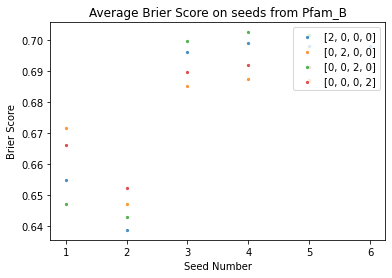

In [17]:

name_data_test = "Pfam_B"
path_folder_fasta_test = f"{path_folder_data_split}/{name_data_test}" 
# context fromat: [len_window_left_k, len_window_right_k, len_window_left_p, len_window_right_p]
#list_list_len_window = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]   
list_list_len_window = [[2, 0, 0, 0], [0, 2, 0, 0], [0, 0, 2, 0], [0, 0, 0, 2]] 
#list_list_len_window = [[1, 0, 0, 0]]     




if brier_Score_naive_Bayes is True:
    for list_len_window in list_list_len_window:
        print(list_len_window)
        list_bloc = []
        for position, len_window in enumerate(list_len_window):
            if len_window != 0:
                list_neighborResSelection_name, list_neighborResSelection = ContextuelBrier.neighborResSelection(position, len_window, percentage_train, path_NeighborRes)         
                list_bloc.append(list_neighborResSelection)
            else:
                list_bloc.append([])
        #cProfile.run("ContextuelBrier.multriContextBayes(path_folder_fasta_test, path_folder_pId, path_NeighborRes, list_len_window, list_bloc, list_residu, pid_inf = 62)", sort = 'tottime')
        ContextuelBrier.multriContextBayes(path_folder_fasta_test, path_folder_pId, path_NeighborRes, list_len_window, list_bloc, list_residu, pid_inf = 62)
        print("")